## Bank transactions dataset

### Research question & sub questions

#### How can a bank effectively segment its customers based on transactional behavior to enhance personalized marketing and improve customer satisfaction?
- What distinct transaction patterns can be identified among different customer segments in the bank's transaction dataset?
- How can customers be effectively segmented based on their transactional behaviors such as frequency, amount, and types of transactions?
- What insights can be obtained about customer preferences and behaviors from the transaction data, and how can these insights be leveraged to enhance service offerings?
- Can the transaction patterns identified be used to predict future customer behaviors or needs, and how can this predictive analysis be integrated into the bank's strategic planning?


### Dataset

- TransactionID: Unique identifier for each transaction.
- CustomerID: Unique identifier for each customer.
- CustomerDOB: Date of birth of the customer.
- CustGender: Gender of the customer.
- CustLocation: Location of the customer.
- CustAccountBalance: Account balance of the customer.
- TransactionDate: Date of the transaction.
- TransactionTime: Time of the transaction.
- TransactionAmount (INR): Amount of the transaction in Indian Rupees.

In [61]:
# Importing the basic libraries
import pandas as pd
import os
import scipy
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import numpy as np
#display all columns 
from IPython.display import display
pd.set_option('display.max_columns', None)

### 1. EDA, Data cleaning and Feature engineering
There are cases when these three processes are done in tandem.

In [62]:
# Reading the DataFrame
df = pd.read_csv(r"C:\Users\alvarocairo\bank_transactions.csv")
print("There are {} rows and {} columns in the dataset".format(df.shape[0], df.shape[1]))

# Showing the Dataset
df

There are 1048567 rows and 9 columns in the dataset


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [63]:
# Info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [64]:
# Descprition off the AccountBalance & TransactionAmount columns
df[['CustAccountBalance', 'TransactionAmount (INR)']].describe()

,CustAccountBalance,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06
mean,1.154035e+05,1.574335e+03
std,8.464854e+05,6.574743e+03
min,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.610000e+02
50%,1.679218e+04,4.590300e+02
75%,5.765736e+04,1.200000e+03
max,1.150355e+08,1.560035e+06


In [65]:
# Display the datatypes in the DataFrame
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [66]:
# Checking for null values
n_nulls = df.loc[lambda x: x.isnull().any(axis=1)].shape
print(f"There are {n_nulls[0]} rows with null values in this dataset")

null_values = df.isnull().sum()
print("Number of null values in each column:")
print(null_values)

There are 6953 rows with null values in this dataset
Number of null values in each column:
TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [67]:
# Droping rows with null values
df.dropna(how='any', inplace=True)

print(f"Number of rows after removing empty rows: {df.shape[0]}")

Number of rows after removing empty rows: 1041614


In [68]:
# Making Male and Female 0 and 1 using mapping
gender_mapping = {'M': 0, 'F': 1}

# Apply the mapping to the column
df['CustGender'] = df['CustGender'].map(gender_mapping)

# Display the column after conversion
print("Updated Gender Column:")
print(df['CustGender'])

Updated Gender Column:
0          1.0
1          0.0
2          1.0
3          1.0
4          1.0
          ... 
1048562    0.0
1048563    0.0
1048564    0.0
1048565    0.0
1048566    0.0
Name: CustGender, Length: 1041614, dtype: float64


In [69]:
# Checking if the Transaction ID's are unique
if (len(df['TransactionID'].unique()) == len(df)):
    print("Transaction ID's are unique, no need to aggregate")
else:
    print("Transaction ID's are not unique, need to aggregate")

Transaction ID's are unique, no need to aggregate


In [70]:
# Dropping the column
df.drop(['TransactionID'], axis = 1, inplace=True)
df.head()

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,C5841053,10/1/94,1.0,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,C2142763,4/4/57,0.0,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,C4417068,26/11/96,1.0,MUMBAI,17874.44,2/8/16,142712,459.0
3,C5342380,14/9/73,1.0,MUMBAI,866503.21,2/8/16,142714,2060.0
4,C9031234,24/3/88,1.0,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [71]:
from datetime import datetime

# Convert 'CustomerDOB' to datetime object and fix century for year
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format='%d/%m/%y', errors='coerce')
df['CustomerDOB'] = df['CustomerDOB'].apply(lambda x: x if x.year < 2023 else x.replace(year=x.year-100))

# Calculate age
current_year = datetime.now().year
df['CustomerAge'] = current_year - df['CustomerDOB'].dt.year

# Dropping the original 'CustomerDOB' column
df.drop('CustomerDOB', axis=1, inplace=True)

# Displaying the first few rows of the updated dataframe
df.head()

,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,C5841053,1.0,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,29.0
1,C2142763,0.0,JHAJJAR,2270.69,2/8/16,141858,27999.0,66.0
2,C4417068,1.0,MUMBAI,17874.44,2/8/16,142712,459.0,27.0
3,C5342380,1.0,MUMBAI,866503.21,2/8/16,142714,2060.0,50.0
4,C9031234,1.0,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,35.0


In [72]:
# Assuming df is your DataFrame
nans_in_customer_age = df['CustomerAge'].isna().sum()
print(f"Number of NaNs in 'CustomerAge': {nans_in_customer_age}")

Number of NaNs in 'CustomerAge': 56292


In [73]:
# Drop rows where 'CustomerAge' is NaN
df.dropna(subset=['CustomerAge'], inplace=True)

# Assuming df is your DataFrame
nans_in_customer_age = df['CustomerAge'].isna().sum()
print(f"Number of NaNs in 'CustomerAge': {nans_in_customer_age}")

df

Number of NaNs in 'CustomerAge': 0


,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,C5841053,1.0,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,29.0
1,C2142763,0.0,JHAJJAR,2270.69,2/8/16,141858,27999.0,66.0
2,C4417068,1.0,MUMBAI,17874.44,2/8/16,142712,459.0,27.0
3,C5342380,1.0,MUMBAI,866503.21,2/8/16,142714,2060.0,50.0
4,C9031234,1.0,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,35.0
...,...,...,...,...,...,...,...,...
1048562,C8020229,0.0,NEW DELHI,7635.19,18/9/16,184824,799.0,33.0
1048563,C6459278,0.0,NASHIK,27311.42,18/9/16,183734,460.0,31.0
1048564,C6412354,0.0,HYDERABAD,221757.06,18/9/16,183313,770.0,34.0
1048565,C6420483,0.0,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,45.0


In [74]:
# Count the unique values in the 'CustLocation' column
unique_cities = df['CustLocation'].nunique()

# Print the number of different cities
print(f"There are {unique_cities} different cities in the 'CustLocation' column.")

There are 8164 different cities in the 'CustLocation' column.


In [75]:

# Count the unique values in the 'CustLocation' column
city_counts = df['CustLocation'].value_counts()

# Group cities based on their occurrences
grouped_cities = {}
for city, count in city_counts.items():
    if count not in grouped_cities:
        grouped_cities[count] = [city]
    else:
        grouped_cities[count].append(city)

# Print the grouped cities
for count, city_list in grouped_cities.items():
    print(f"Cities that occur {count} times: {', '.join(city_list)}")


Cities that occur 97679 times: MUMBAI
Cities that occur 77751 times: BANGALORE
Cities that occur 76380 times: NEW DELHI
Cities that occur 70518 times: GURGAON
Cities that occur 67335 times: DELHI
Cities that occur 31675 times: NOIDA
Cities that occur 27500 times: CHENNAI
Cities that occur 24493 times: PUNE
Cities that occur 21819 times: HYDERABAD
Cities that occur 21006 times: THANE
Cities that occur 19033 times: KOLKATA
Cities that occur 14624 times: GHAZIABAD
Cities that occur 11932 times: NAVI MUMBAI
Cities that occur 11266 times: AHMEDABAD
Cities that occur 10641 times: FARIDABAD
Cities that occur 9231 times: JAIPUR
Cities that occur 8801 times: CHANDIGARH
Cities that occur 7338 times: LUCKNOW
Cities that occur 5828 times: MOHALI
Cities that occur 5173 times: SURAT
Cities that occur 4645 times: NASHIK
Cities that occur 4354 times: LUDHIANA
Cities that occur 4173 times: VISAKHAPATNAM
Cities that occur 3961 times: DEHRADUN
Cities that occur 3620 times: INDORE
Cities that occur 3584 t

In [76]:
# Count the occurrences of each city in the 'CustLocation' column
city_counts = df['CustLocation'].value_counts()

# Identify the top 5 most frequent locations
top_locations = city_counts.head(5).index.tolist()

# Create a new column 'GroupedLocation' based on the top locations and 'Others'
df['GroupedLocation'] = df['CustLocation'].apply(lambda x: x if x in top_locations else 'Others')

# Count the occurrences of each grouped location
grouped_counts = df['GroupedLocation'].value_counts()

# Print the grouped locations
for location, count in grouped_counts.items():
    print(f"Location: {location}, Count: {count}")

Location: Others, Count: 595659
Location: MUMBAI, Count: 97679
Location: BANGALORE, Count: 77751
Location: NEW DELHI, Count: 76380
Location: GURGAON, Count: 70518
Location: DELHI, Count: 67335


In [77]:
# Count the occurrences of each city
city_counts = df['CustLocation'].value_counts()

# Identify the top 5 most frequent locations
top_cities = city_counts.head(5)

# Create a DataFrame with the top cities and their counts
top_cities_table = pd.DataFrame({'City': top_cities.index, 'Count': top_cities.values})

# Add a row for 'Others' by summing counts of cities beyond the top 4
other_count = city_counts.iloc[5:].sum()
other_row = pd.DataFrame({'City': ['Others'], 'Count': [other_count]})
top_cities_table = pd.concat([top_cities_table, other_row], ignore_index=True)

# Sort the table in decreasing order by count
top_cities_table = top_cities_table.sort_values(by='Count', ascending=False)

# Reset index for a clean table
top_cities_table.reset_index(drop=True, inplace=True)

# Print the resulting table
print(top_cities_table)

        City   Count
0     Others  595659
1     MUMBAI   97679
2  BANGALORE   77751
3  NEW DELHI   76380
4    GURGAON   70518
5      DELHI   67335


In [78]:
# Define a dictionary mapping city names to numerical values
city_to_num = {
    'MUMBAI': 1,
    'BANGALORE': 2,
    'NEW DELHI': 3,
    'GURGAON': 4,
    'DELHI': 5
}

# Apply the mapping to the 'CustLocation' column, replace other values with 0
df['CustLocation'] = df['CustLocation'].map(city_to_num).fillna(0)

# Now df['CustLocation'] will have numerical values as per your requirement
df


,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,GroupedLocation
0,C5841053,1.0,0.0,17819.05,2/8/16,143207,25.0,29.0,Others
1,C2142763,0.0,0.0,2270.69,2/8/16,141858,27999.0,66.0,Others
2,C4417068,1.0,1.0,17874.44,2/8/16,142712,459.0,27.0,MUMBAI
3,C5342380,1.0,1.0,866503.21,2/8/16,142714,2060.0,50.0,MUMBAI
4,C9031234,1.0,0.0,6714.43,2/8/16,181156,1762.5,35.0,Others
...,...,...,...,...,...,...,...,...,...
1048562,C8020229,0.0,3.0,7635.19,18/9/16,184824,799.0,33.0,NEW DELHI
1048563,C6459278,0.0,0.0,27311.42,18/9/16,183734,460.0,31.0,Others
1048564,C6412354,0.0,0.0,221757.06,18/9/16,183313,770.0,34.0,Others
1048565,C6420483,0.0,0.0,10117.87,18/9/16,184706,1000.0,45.0,Others


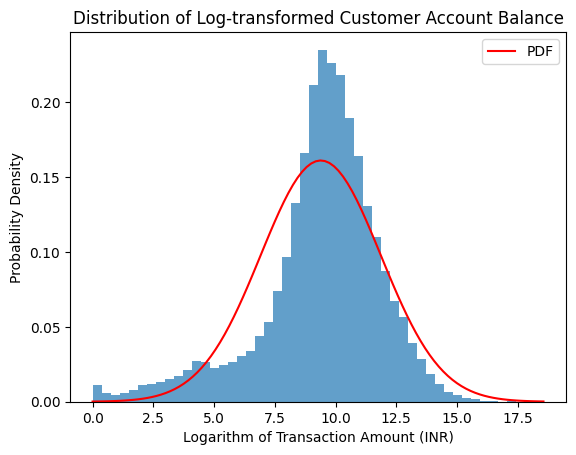

In [88]:
from scipy import stats

# Histogram of CustAccountBalance column
log_balance = np.log1p(df['CustAccountBalance'])

plt.hist(log_balance, bins=50, density=True, alpha=0.7)
plt.xlabel('Logarithm of Transaction Amount (INR)')
plt.ylabel('Probability Density')
plt.title('Distribution of Log-transformed Customer Account Balance')
x = np.linspace(log_balance.min(), log_balance.max(), 100)
dist = stats.norm(log_balance.mean(), log_balance.std())
plt.plot(x, dist.pdf(x), color='red', label='PDF')
plt.legend()
plt.show()

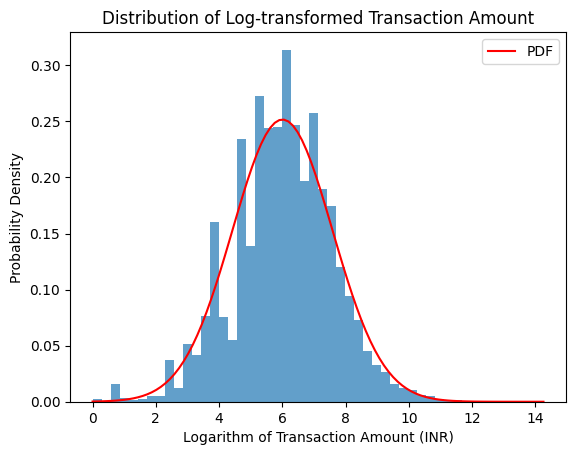

In [91]:
# Histogram of 'TransactionAmount (INR)' column
log_trx_amount = np.log1p(df['TransactionAmount (INR)'])

plt.hist(log_trx_amount, bins=50, density=True, alpha=0.7)
plt.xlabel('Logarithm of Transaction Amount (INR)')
plt.ylabel('Probability Density')
plt.title('Distribution of Log-transformed Transaction Amount')
x = np.linspace(log_trx_amount.min(), log_trx_amount.max(), 100)
dist = stats.norm(log_trx_amount.mean(), log_trx_amount.std())
plt.plot(x, dist.pdf(x), color='red', label='PDF')
plt.legend()
plt.show()

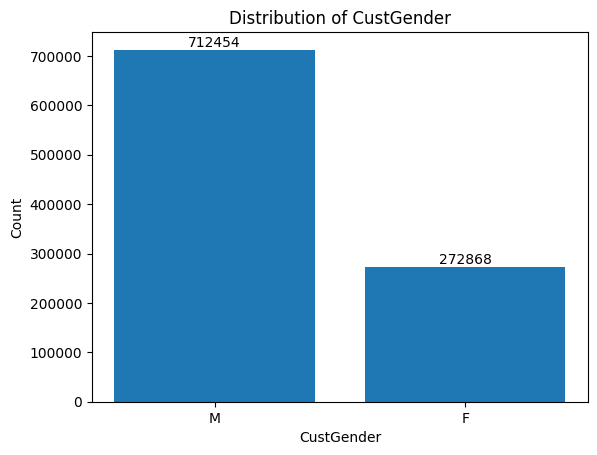

In [90]:
import matplotlib.pyplot as plt

# Assuming df['CustGender'] contains the gender data
gender_counts = df['CustGender'].value_counts()

# Creating the bar plot
# Use a numeric index for the x-axis (0 for 'M', 1 for 'F')
plt.bar(range(len(gender_counts)), gender_counts.values)

# Setting labels and title
plt.xlabel('CustGender')
plt.ylabel('Count')
plt.title('Distribution of CustGender')

# Adding labels to the bars
for i, count in enumerate(gender_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Setting the x-ticks and their labels to 'M' for Male and 'F' for Female
# Adjust the order if necessary based on how your data is sorted
plt.xticks(range(len(gender_counts)), ['M', 'F'])

# Displaying the plot
plt.show()


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)